# **Assignment 3**

Savitri Dyah Ayu Pitaloka / PYTN-KS10-012

## Project Overview


The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014] bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input variables:

##### Bank Client Data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')

6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')


##### Related With The Last Contact of The Current Campaign:

8 - contact: contact communication type (categorical: 'cellular', 'telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. 

##### Other Attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')


##### Social and Economic Context Attributes:

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


##### Output Variable (Desired Target):

21 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

### Data Preparation

import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

import dataset menjadi DataFrame dan melihat 5 baris teratas dari DataFrame

In [2]:
df_bank = pd.read_csv("bank-additional-full.csv", sep=';')
pd.set_option("display.max_columns", None)
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


melihat 5 baris terbawah DataFrame

In [3]:
df_bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


melihat semua kolom, tipe datanya, dan cek null values

In [4]:
df_bank.info()
df_bank.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

melihat shape dari DataFrame

In [5]:
df_bank.shape

(41188, 21)

### Pre-Processing and Exploratory Data Analysis

cek jumlah nilai duplikat

In [6]:
df_bank.duplicated().sum()

12

menghapus nilai duplikat

In [7]:
df_bank.drop_duplicates(inplace=True)

cek missing value

In [8]:
df_bank.isna().sum()/len(df_bank)

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

drop missing value

In [9]:
df_bank.dropna(inplace=True)

melihat semua kolom dan tipe data

In [10]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

melihat statistika deskriptif DataFrame

In [11]:
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


membuat histogram untuk kolom pdays dengan dan tanpa nilai 999

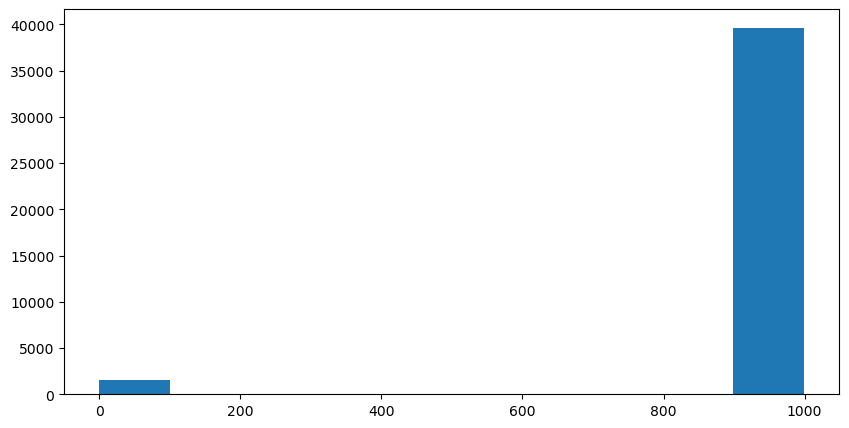

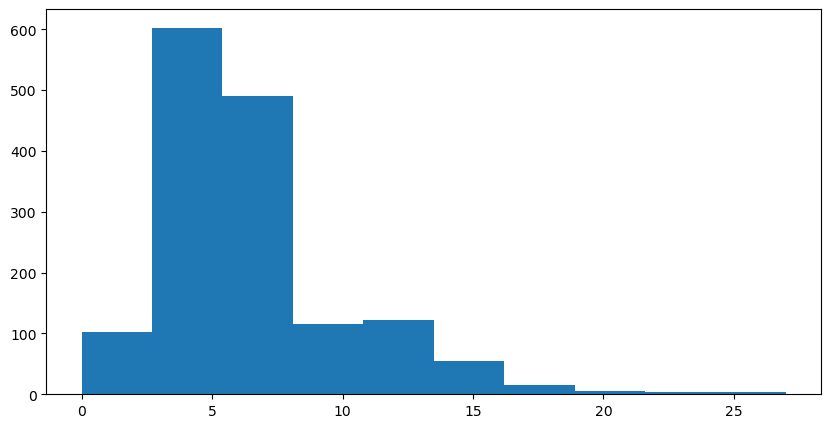

In [12]:
plt.figure(figsize=(10,5))

def drawhist(df,feature):
    plt.hist(df[feature])
drawhist(df_bank,'pdays')
plt.show()

plt.figure(figsize=(10,5))
plt.hist(df_bank.loc[df_bank.pdays != 999, 'pdays'])
plt.show()

dapat dilihat bahwa terdapat banyak nilai 999, lalu diamsumsikan sebagai missing value dan kemudian diubah menjadi categorical variable

In [13]:
df_bank['pdays_missing'] = 0
df_bank['pdays_less_5'] = 0
df_bank['pdays_greater_15'] = 0
df_bank['pdays_bet_5_15'] = 0
df_bank['pdays_missing'][df_bank['pdays'] == 999] = 1
df_bank['pdays_less_5'][df_bank['pdays']<5] = 1
df_bank['pdays_greater_15'][(df_bank['pdays']>15) & (df_bank['pdays']<999)] = 1
df_bank['pdays_bet_5_15'][(df_bank['pdays']>=5)&(df_bank['pdays']<=15)]= 1

menghapus kolom yang tidak relevan

In [14]:
kol = ['duration', 'pdays']
df_bank.drop(kol, axis=1,inplace=True)

membuat bar plot untuk categorical variables

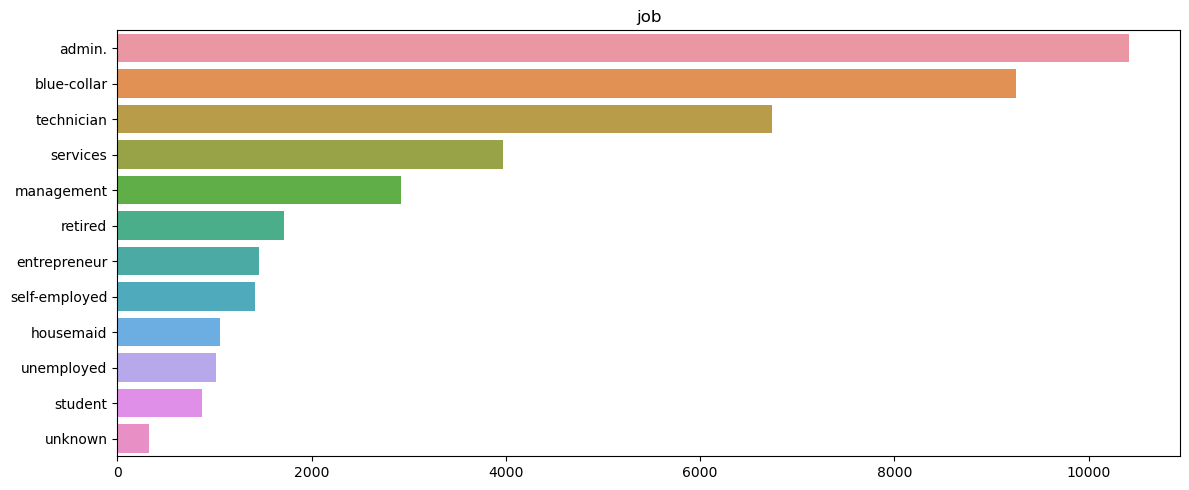

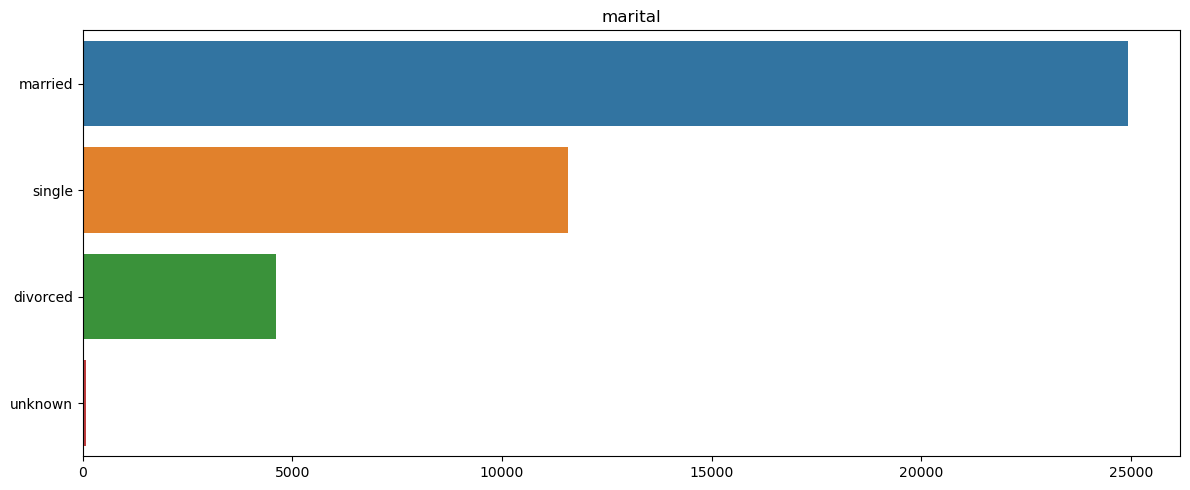

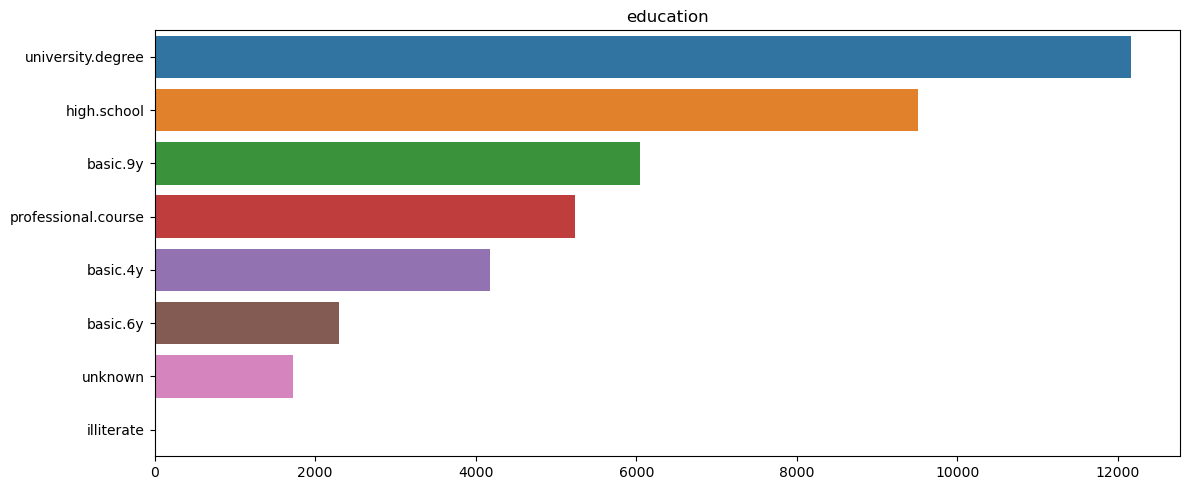

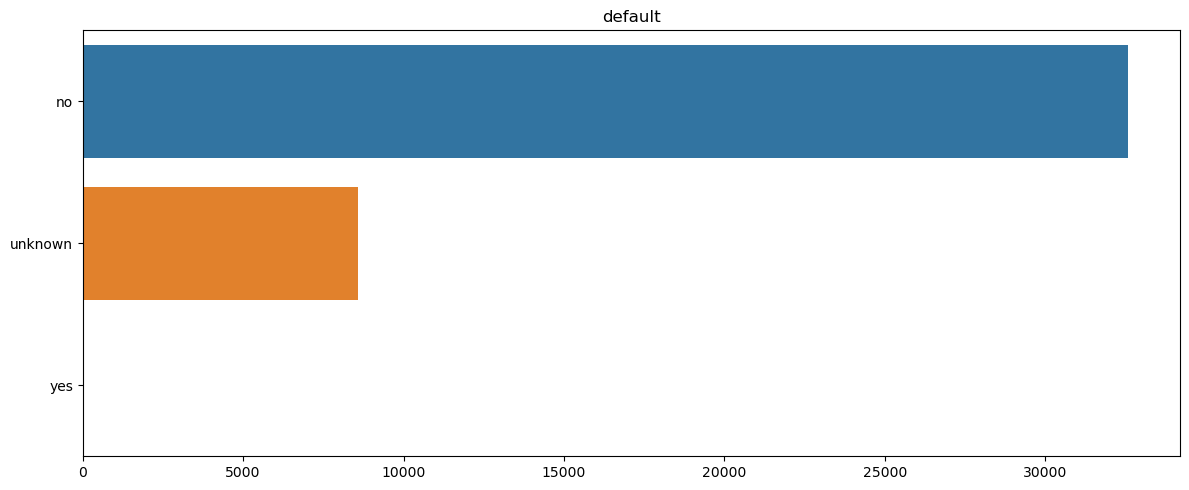

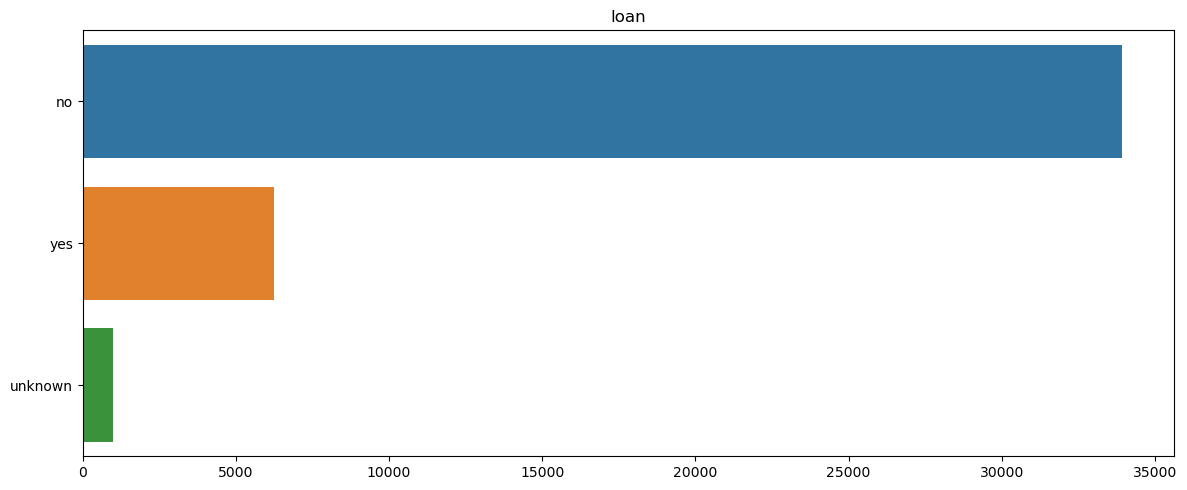

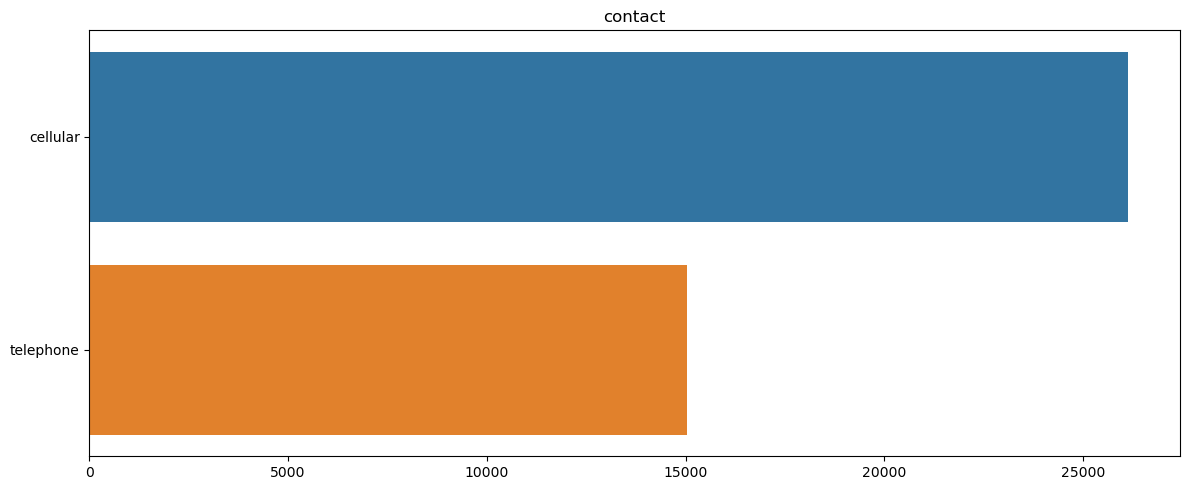

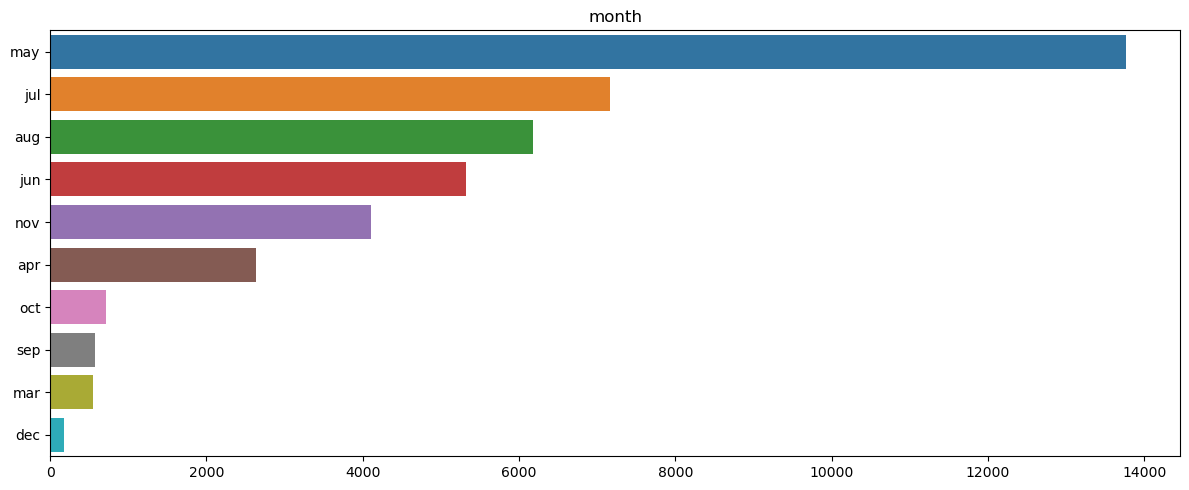

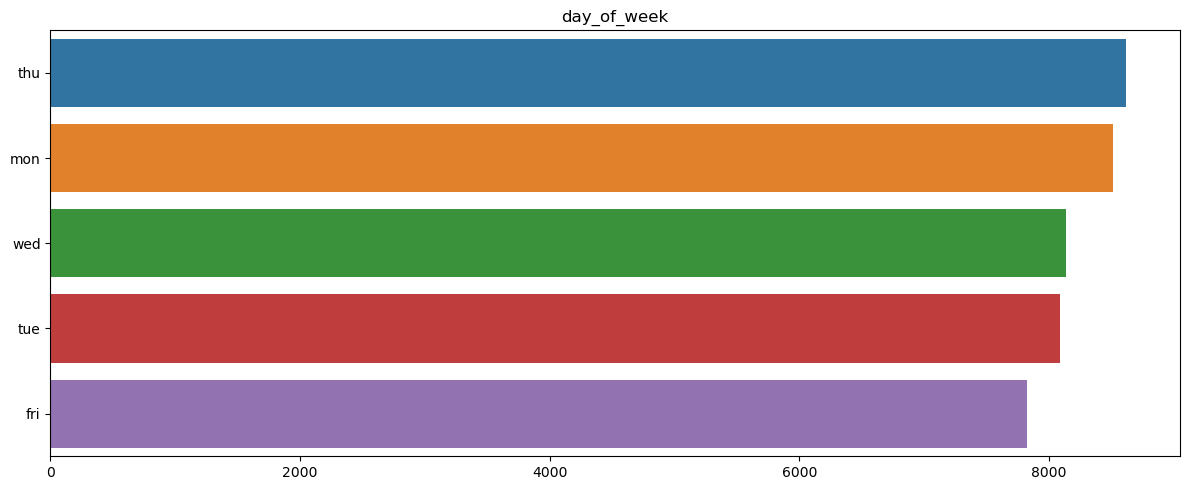

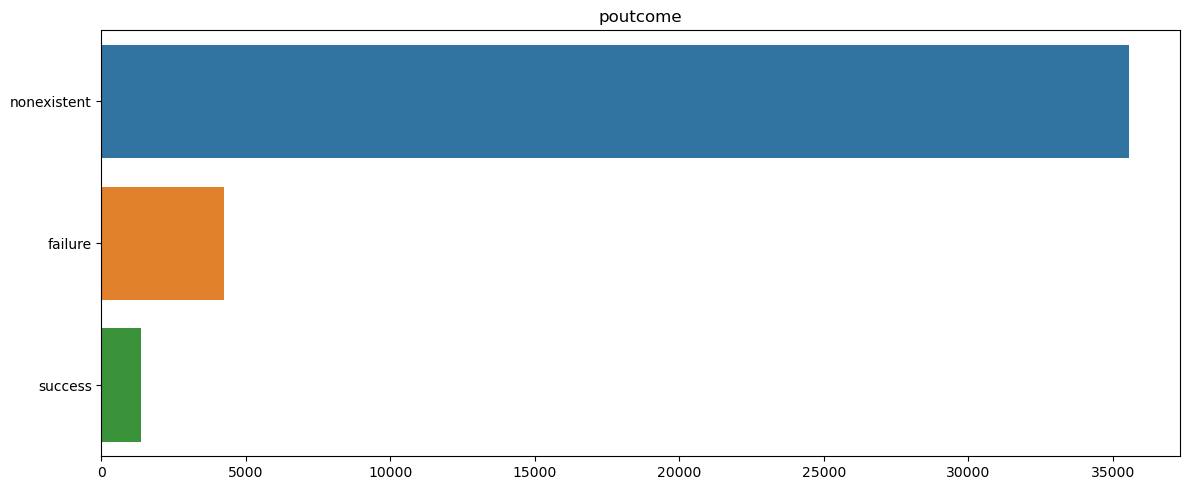

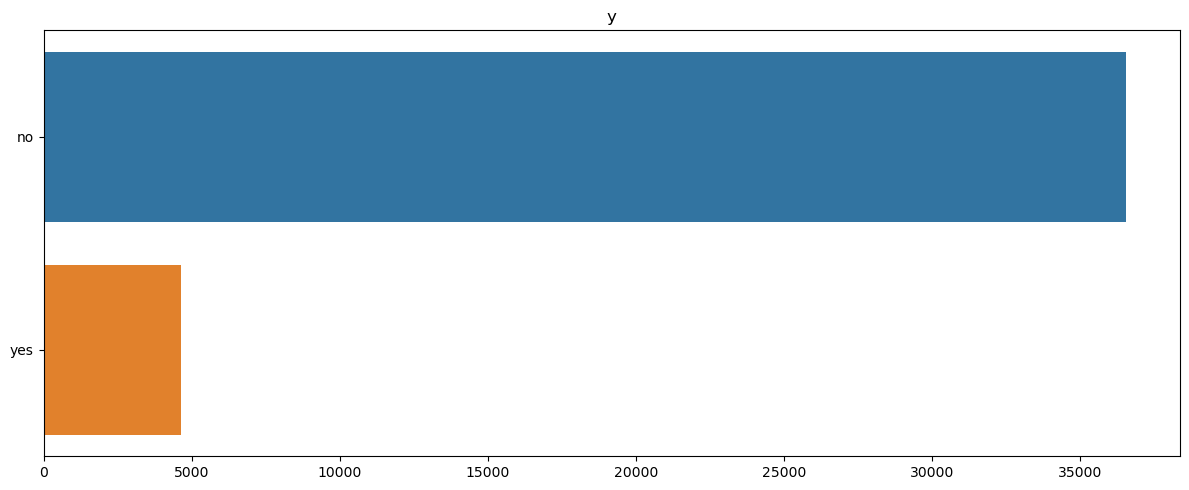

In [15]:
categorical_var = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorical_var:
    plt.figure(figsize=(12,5))
    sns.barplot(df_bank[col].value_counts().values, df_bank[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

membuat bar plot untuk tiap hasilnya yang dilihat dari frekuensi relatif dan frekuensi relatif yang dinormalisasi 

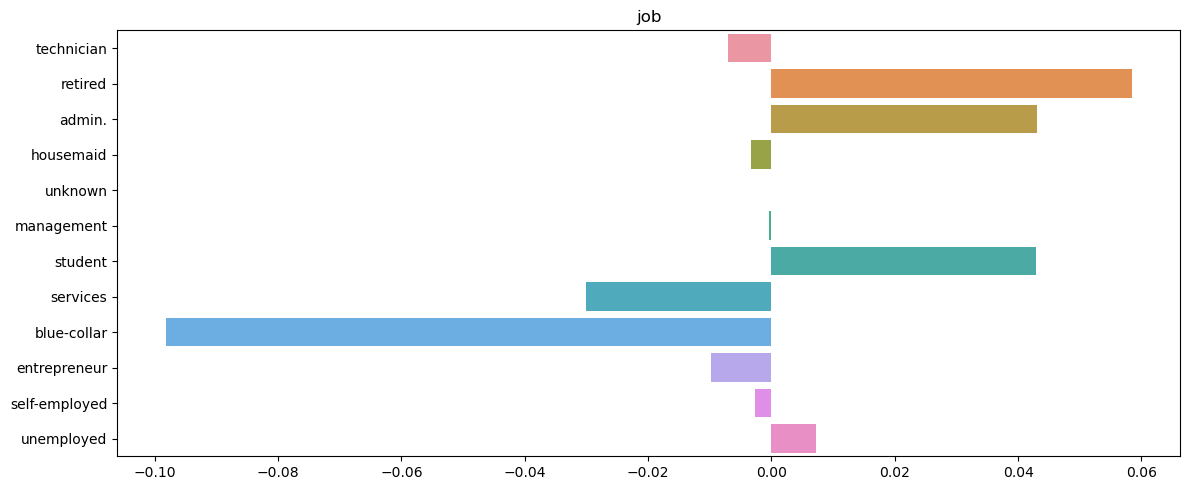

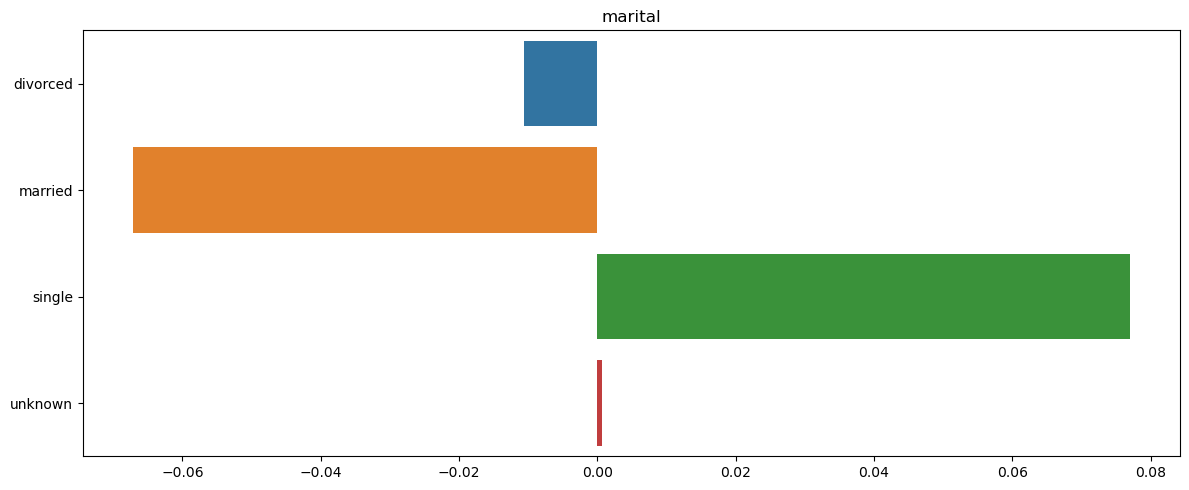

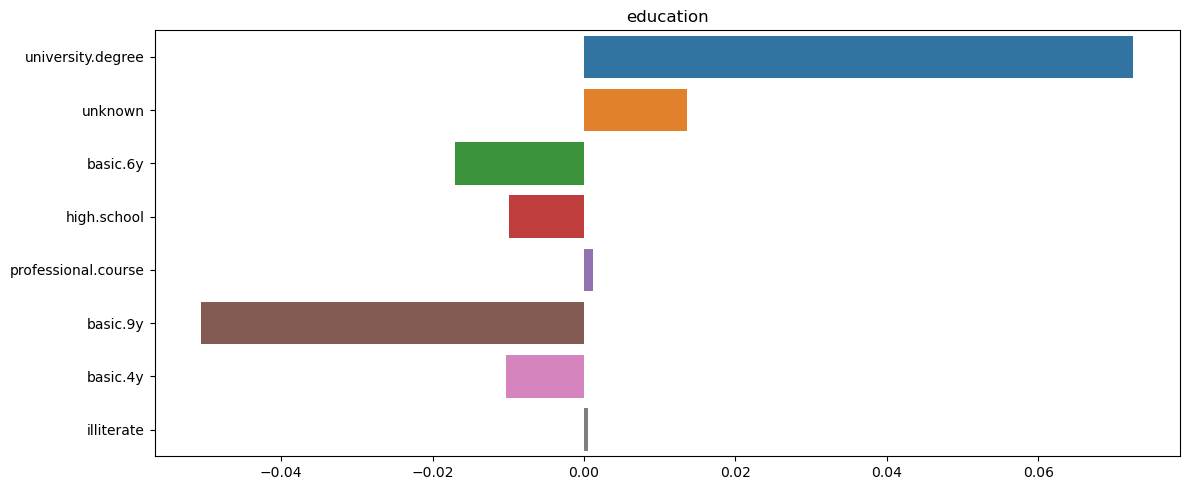

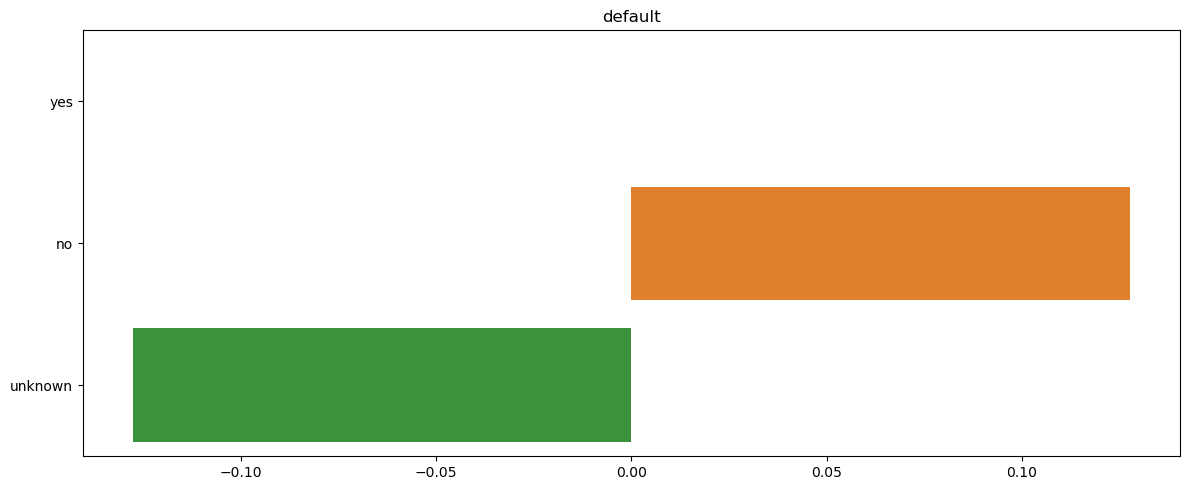

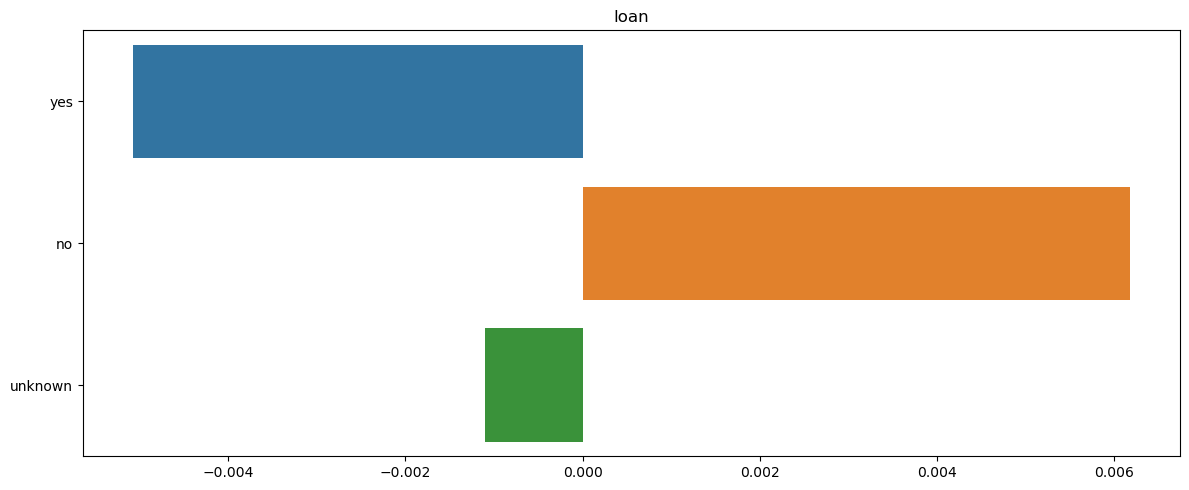

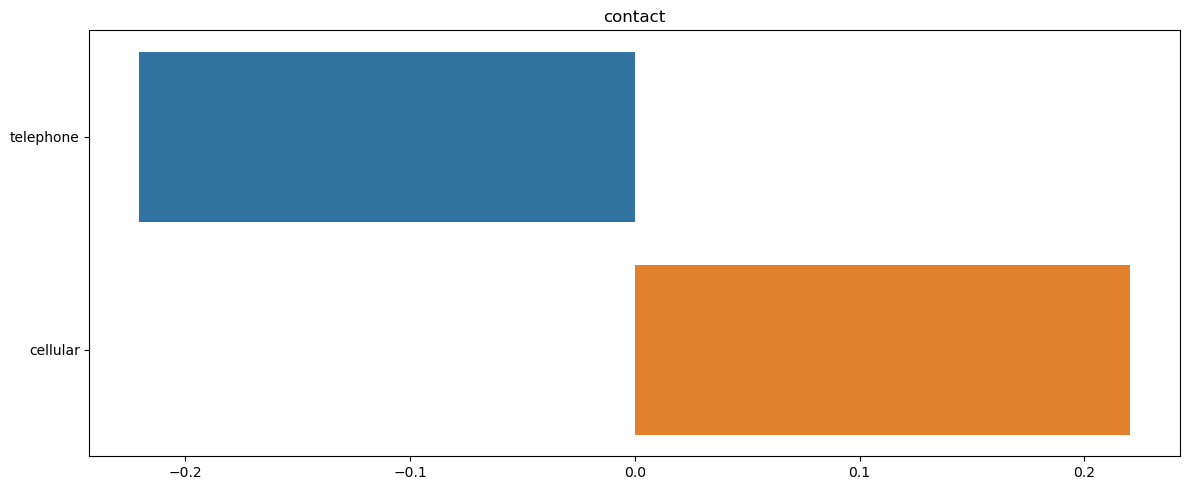

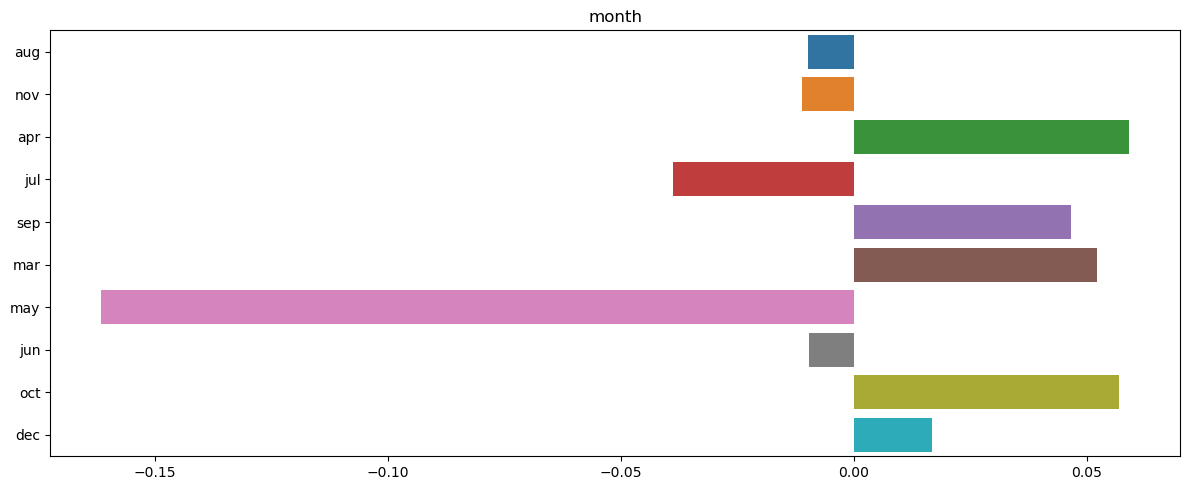

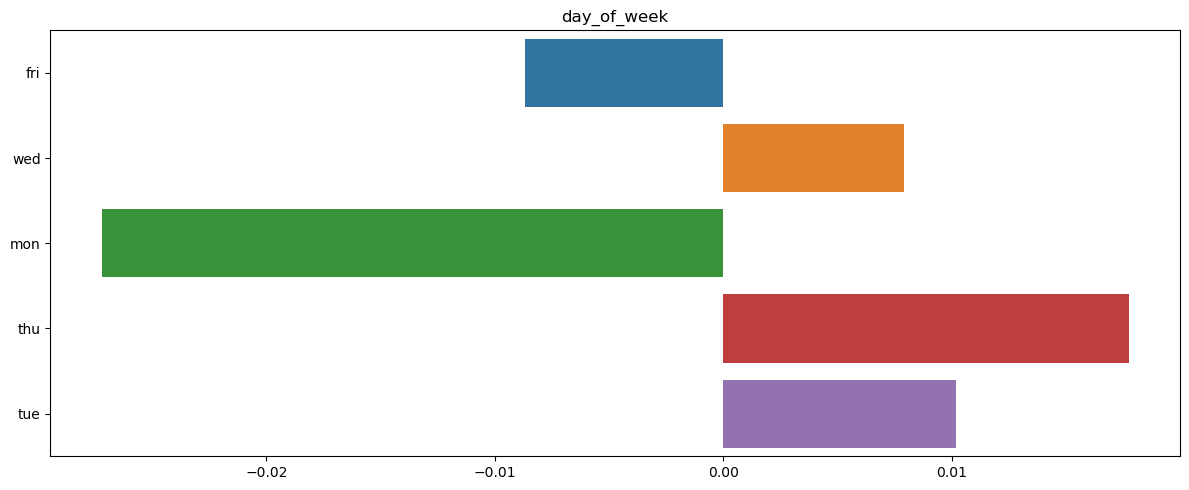

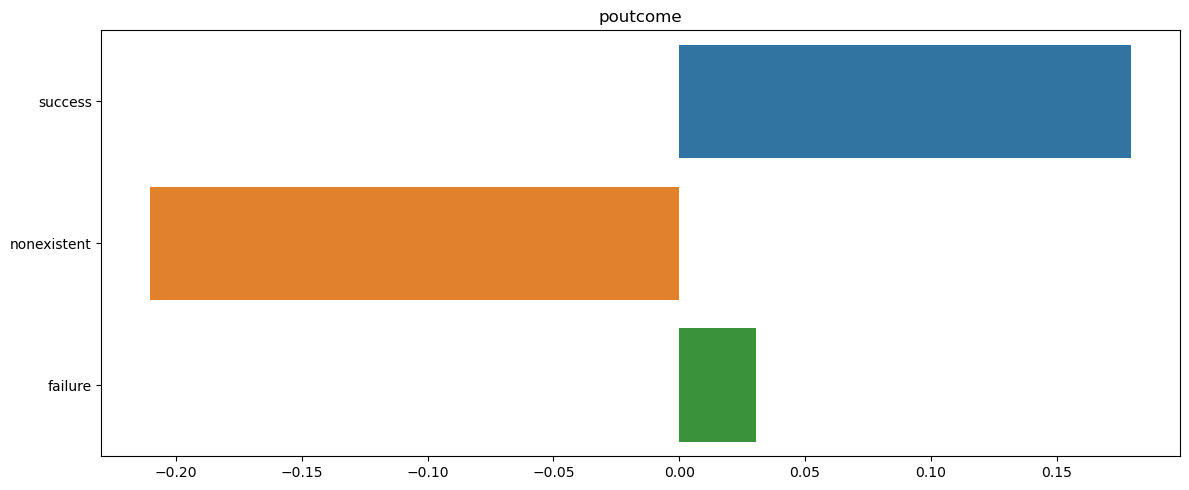

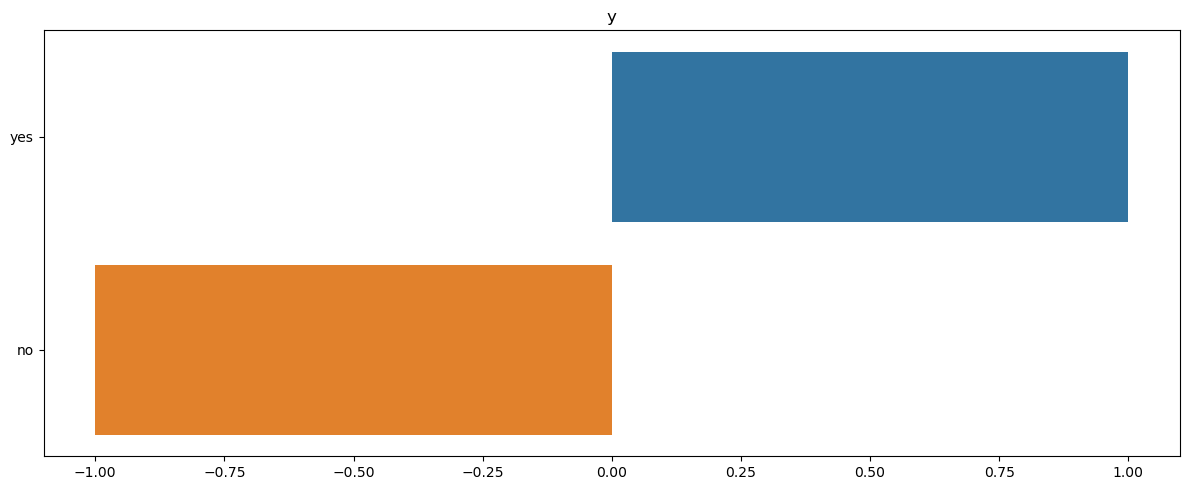

In [16]:
categorical_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorical_variables:
    plt.figure(figsize=(12,5))
    #Returns counts of unique values for each outcome for each feature
    pos_counts = df_bank.loc[df_bank.y.values == 'yes', col].value_counts() 
    neg_counts = df_bank.loc[df_bank.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded
    freq_pos = (df_bank.y.values == 'yes').sum()
    freq_neg = (df_bank.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

membuat bar plot yang menunjukkan persentase dari variabel target (y) berdasarkan jenis pekerjaan

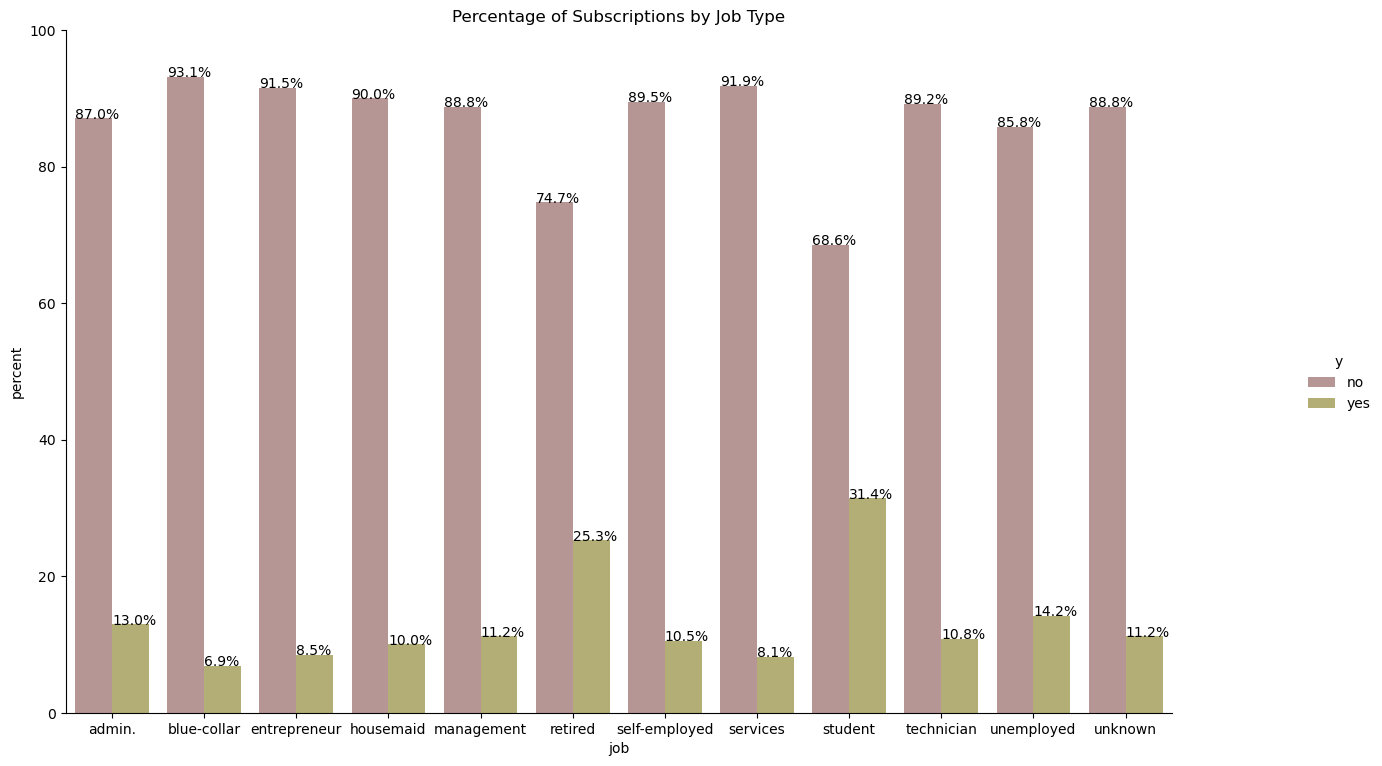

In [17]:
df_job = df_bank.groupby("job")['y'].value_counts(normalize=True)
df_job = df_job.mul(100)
df_job = df_job.rename('percent').reset_index()

g = sns.catplot(x='job',y='percent', hue='y', kind='bar', palette=['rosybrown','darkkhaki'], data=df_job).set(title="Percentage of Subscriptions by Job Type")
g.ax.set_ylim(0,100) 
g.fig.set_size_inches(15,8)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y= p.get_height()
    g.ax.text(txt_x, txt_y,txt)

membuat cross tab def code untuk EDA
- cross tab (tabulasi silang) merupakan metode untuk mentabulasikan beberapa variabel yang berbeda ke dalam suatu matriks. Hasil tabulasi silang disajikan ke dalam suatu tabel dengan variabel yang tersusun sebagai kolom dan baris.

In [18]:
def cross_tab(df_bank,f1,f2):
    job = list(df_bank[f1].unique())
    education = list(df_bank[f2].unique())
    dataframes=[]
    for e in education:
        dfe=df_bank[df_bank[f2] == e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx = pd.concat(dataframes,axis=1)
    xx.columns=education
    xx=xx.fillna(0)
    return xx

membuat cross tab untuk variabel job dan education

In [19]:
cross_tab(df_bank,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77,3329,151,499,363,249,5750,1.0
blue-collar,2318,878,1425,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,97,284,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2680,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0


mengisi data *unknown* dengan data yang relevan

In [20]:
df_bank.loc[(df_bank['age']>60) & (df_bank['job']=='unknown'), 'job'] = 'retired'
df_bank.loc[(df_bank['education']=='unknown') & (df_bank['job']=='management'), 'education'] = 'university.degree'
df_bank.loc[(df_bank['education']=='unknown') & (df_bank['job']=='services'), 'education'] = 'high.school'
df_bank.loc[(df_bank['education']=='unknown') & (df_bank['job']=='housemaid'), 'education'] = 'basic.4y'
df_bank.loc[(df_bank['job'] == 'unknown') & (df_bank['education']=='basic.4y'), 'job'] = 'blue-collar'
df_bank.loc[(df_bank['job'] == 'unknown') & (df_bank['education']=='basic.6y'), 'job'] = 'blue-collar'
df_bank.loc[(df_bank['job'] == 'unknown') & (df_bank['education']=='basic.9y'), 'job'] = 'blue-collar'
df_bank.loc[(df_bank['job']=='unknown') & (df_bank['education']=='professional.course'), 'job'] = 'technician'

cek data yang sudah diisi dengan cross tab

In [21]:
cross_tab(df_bank,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77.0,3329,151.0,499.0,363.0,249.0,5750,1.0
blue-collar,2366.0,878,1447.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,111.0,285,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2830,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0


mmebuat cross tab untuk variabel job dan housing

In [22]:
cross_tab(df_bank,'job','housing')

,no,yes,unknown
job,,,
admin.,4634,5558,227
blue-collar,4361,4752,241
entrepreneur,641,779,36
housemaid,491,540,29
management,1363,1490,71
retired,787,908,44
self-employed,641,740,40
services,1817,2049,101
student,381,471,23


karena masih banyak data *unknown* sehingga harus dihilangkan

In [23]:
df_bank = df_bank[df_bank.housing != 'unknown']
df_bank = df_bank[df_bank.loan != 'unknown']
df_bank = df_bank[df_bank.default != 'unknown']
df_bank = df_bank[df_bank.job != 'unknown']
df_bank = df_bank[df_bank.marital != 'unknown']
df_bank = df_bank[df_bank.education != 'unknown']

melihat shape DataFrame setelah di pre-processing

In [24]:
df_bank.shape

(30783, 23)

melihat 5 baris teratas dari DataFrame

In [25]:
pd.set_option("display.max_columns", None)
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0


encode categorical variables dengan label encoder

In [26]:
categorical_col = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
label_encoder = LabelEncoder()
for col in categorical_col:
    df_bank[col] = label_encoder.fit_transform(df_bank[col])
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,56,3,1,0,0,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
2,37,7,1,3,0,1,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
3,40,0,1,1,0,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
4,56,7,1,3,0,0,1,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
6,59,0,1,5,0,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0


membuat def code untuk visualisasi

In [27]:
def drawheatmap(df_bank):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df_bank.corr(method='spearman'), annot=False, cmap='coolwarm')
    
def drawhist(df_bank,feature):
    '''Draws an histogram for a feature in a data frame (df)'''
    plt.hist(df_bank[feature])

def functionreplace(df_bank,fea,val1,val2):
    '''Replaces value (val1) with value (val2) in the data frame (df) for a feature (fea)'''
    df_bank[fea].replace(val1,val2)
    return df_bank

def drawbarplot(df_bank,x,y):
    '''Draws a bar plot for a given feature x and y in a data frame'''
    sns.barplot(x=x, y=y, data=df_bank)

membuat heat map untuk clean data

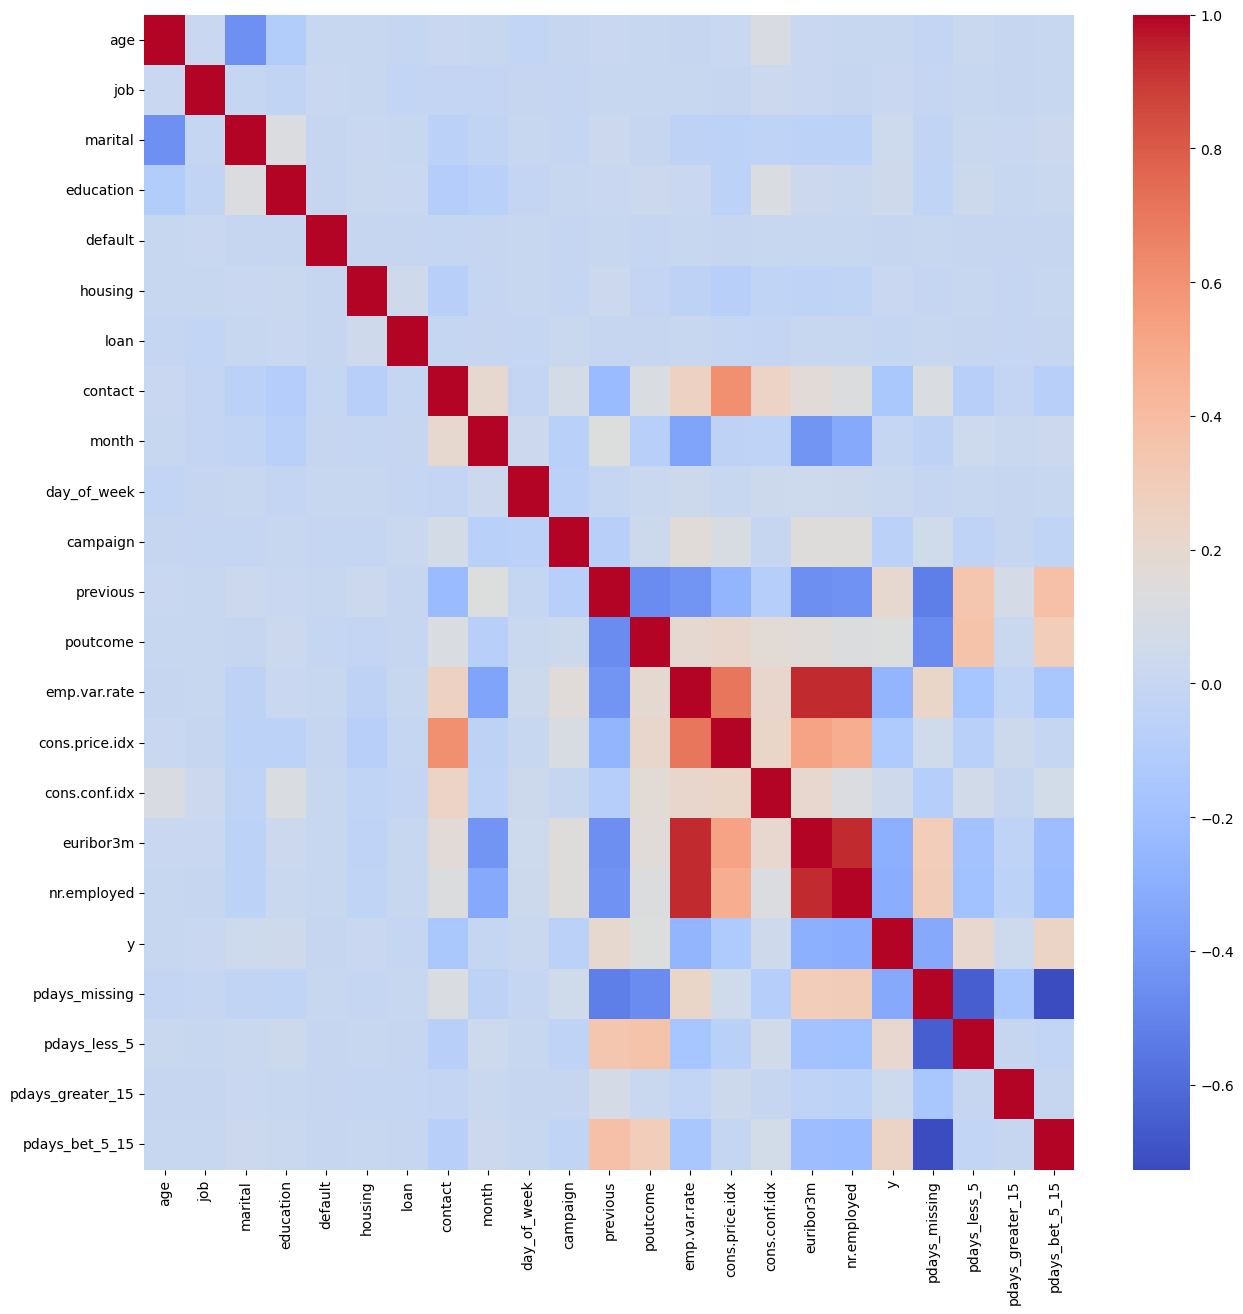

In [28]:
drawheatmap(df_bank)

inisialisasi data yang sudah clean

In [29]:
df_clean = df_bank

### Data Partition and Data Scaling

split data

In [30]:
X = df_clean.drop(labels='y', axis=1)
y = df_clean['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

scaling data nya

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

- proses scaling hanya dihitung dengan data training.

transformasi X nya

In [32]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

melihat data X_train yang sudah di scaling

In [33]:
X_train_scaled

array([[-7.76726688e-03, -1.02885167e+00, -3.12325670e-01, ...,
        -1.35812355e-01, -3.18781877e-02, -1.55444613e-01],
       [ 2.81753491e-01, -7.50663970e-01, -3.12325670e-01, ...,
        -1.35812355e-01, -3.18781877e-02, -1.55444613e-01],
       [-1.06934338e+00,  1.47483764e+00,  1.29606662e+00, ...,
        -1.35812355e-01, -3.18781877e-02, -1.55444613e-01],
       ...,
       [ 7.64288088e-01,  8.38991333e-02, -3.12325670e-01, ...,
        -1.35812355e-01,  3.13694119e+01, -1.55444613e-01],
       [-4.90301864e-01,  1.47483764e+00, -3.12325670e-01, ...,
        -1.35812355e-01, -3.18781877e-02, -1.55444613e-01],
       [-1.04274186e-01,  1.47483764e+00, -3.12325670e-01, ...,
        -1.35812355e-01, -3.18781877e-02, -1.55444613e-01]])

melihat data X_test yang sudah di scaling

In [34]:
X_test_scaled

array([[-0.77982262,  1.47483764,  1.29606662, ..., -0.13581236,
        -0.03187819, -0.15544461],
       [-0.20078111, -1.02885167,  1.29606662, ..., -0.13581236,
        -0.03187819, -0.15544461],
       [-0.97283646,  0.64027454, -0.31232567, ..., -0.13581236,
        -0.03187819, -0.15544461],
       ...,
       [-0.6833157 , -1.02885167, -0.31232567, ..., -0.13581236,
        -0.03187819,  6.43315958],
       [-0.58680878,  0.91846224,  1.29606662, ...,  7.36310034,
        -0.03187819, -0.15544461],
       [-1.1658503 ,  0.91846224,  1.29606662, ..., -0.13581236,
        -0.03187819, -0.15544461]])

### Modelling

- Untuk pemodelan, akan digunakan 6 algoritma yang berbeda untuk menemukan model evaluasi yang terbaik. Algoritma tersebut adalah Logistic Regression, K-Nearest Neighbors, Support Vector Machine (SVM), Decision Tree, Random Forest, dan Naive Bayes. Alasan mengapa menggunakan algoritma tersebut karena kasus disini adalah classification, dan algoritma tersebut merupakan classification models dalam machine learning.

#### Logistic Regression

inisialisasi parameter model Logistic Regression

In [35]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=46, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

fit model dengan data training yang sudah di scaling

In [36]:
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=46, solver='liblinear')

melihat intercept dan coefficient model

In [37]:
print(model.intercept_, model.coef_)

[-2.34958562] [[ 4.03380044e-02  3.47388713e-02  6.10413788e-02  6.91623443e-02
  -4.11260452e-02 -1.34478310e-03  9.45651036e-04 -3.61614680e-01
  -2.25169371e-01  1.03166217e-01 -9.42740822e-02 -5.89280186e-02
   1.34511429e-01 -1.37140407e+00  4.71052160e-01  6.49679824e-02
   1.05694859e+00 -8.19126368e-01 -1.11767309e-01  6.95182220e-02
   2.31214347e-03  8.73507428e-02]]


membuat prediction untuk data testing yang sudah di scaling

In [38]:
pred_1 = model.predict(X_test_scaled)

evaluasi model dengan confusion matrix

In [39]:
confusion_matrix(y_test, pred_1)

array([[5283,   93],
       [ 595,  186]], dtype=int64)

evaluasi model dengan classification report

In [40]:
print(classification_report(y_test, pred_1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5376
           1       0.67      0.24      0.35       781

    accuracy                           0.89      6157
   macro avg       0.78      0.61      0.64      6157
weighted avg       0.87      0.89      0.86      6157



#### K-Nearest Neighbors

parameter terbaik yang ditemukan adalah metric='manhattan',n_neighbors=5, weights='distance. 
untuk mempersingkat waktu, maka dilakukan pemodelan dengan parameter optimal yang diperoleh sebelumnya.

In [41]:
model_2 = KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='distance')

fit model dengan data training yang sudah di scaling

In [42]:
model_2.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

membuat prediction untuk data testing yang sudah di scaling

In [43]:
pred_2 = model_2.predict(X_test_scaled)

evaluasi model dengan confusion matrix

In [44]:
confusion_matrix(y_test, pred_2)

array([[5108,  268],
       [ 542,  239]], dtype=int64)

evaluasi model dengan classification report

In [45]:
print(classification_report(y_test, pred_2))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      5376
           1       0.47      0.31      0.37       781

    accuracy                           0.87      6157
   macro avg       0.69      0.63      0.65      6157
weighted avg       0.85      0.87      0.86      6157



#### Support Vector Machine (SVM)

inisialisasi parameter model SVM

In [46]:
model_3 = svm.SVC(kernel='linear', random_state=46)

fit model dengan data training yang sudah di scaling

In [47]:
model_3.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=46)

membuat prediction untuk data testing yang sudah di scaling

In [48]:
pred_3 = model_3.predict(X_test_scaled)

evaluasi model dengan confusion matrix

In [49]:
confusion_matrix(y_test, pred_3)

array([[5274,  102],
       [ 605,  176]], dtype=int64)

evaluasi model dengan classification report

In [50]:
print(classification_report(y_test, pred_3))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5376
           1       0.63      0.23      0.33       781

    accuracy                           0.89      6157
   macro avg       0.77      0.60      0.63      6157
weighted avg       0.86      0.89      0.86      6157



#### Decision Tree

parameter terbaik yang ditemukan adalah criteria='entropy',max_depth=100. 
untuk mempersingkat waktu, maka dilakukan pemodelan dengan parameter optimal yang diperoleh sebelumnya.

In [51]:
model_4 = DecisionTreeClassifier(criterion='entropy', max_depth=100, random_state=46)

fit model dengan data training

In [52]:
model_4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100, random_state=46)

membuat prediction untuk data testing 

In [53]:
pred_4 = model_4.predict(X_test)

evaluasi model dengan confusion matrix

In [54]:
confusion_matrix(y_test, pred_4)

array([[4850,  526],
       [ 513,  268]], dtype=int64)

evaluasi model dengan classification report

In [55]:
print(classification_report(y_test, pred_4))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5376
           1       0.34      0.34      0.34       781

    accuracy                           0.83      6157
   macro avg       0.62      0.62      0.62      6157
weighted avg       0.83      0.83      0.83      6157



#### Random Forest

parameter terbaik yang ditemukan adalah criteria='entropy',max_features='auto',n_estimators=1000. Untuk mempersingkat waktu, maka dilakukan pemodelan dengan parameter optimal yang diperoleh sebelumnya.

In [56]:
model_5 = RandomForestClassifier(criterion='entropy', max_features='auto', n_estimators=1000, random_state=46)

fit model dengan data training

In [57]:
model_5.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=1000, random_state=46)

membuat prediction untuk data testing

In [58]:
pred_5 = model_5.predict(X_test)

evaluasi model dengan confusion matrix

In [59]:
confusion_matrix(y_test, pred_5)

array([[5178,  198],
       [ 543,  238]], dtype=int64)

evaluasi model dengan classification report

In [60]:
print(classification_report(y_test, pred_5))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      5376
           1       0.55      0.30      0.39       781

    accuracy                           0.88      6157
   macro avg       0.73      0.63      0.66      6157
weighted avg       0.86      0.88      0.86      6157



#### Naive Bayes

inisialisasi parameter model Naive Bayes

In [61]:
model_6 = GaussianNB()

fit model dengan data training yang sudah di scaling

In [62]:
model_6.fit(X_train_scaled, y_train)

GaussianNB()

membuat prediction untuk data testing yang sudah di scaling

In [63]:
pred_6 = model_6.predict(X_test_scaled)

evaluasi model dengan confusion matrix

In [64]:
confusion_matrix(y_test, pred_6)

array([[3244, 2132],
       [ 180,  601]], dtype=int64)

evaluasi model dengan classification report

In [65]:
print(classification_report(y_test, pred_6))

              precision    recall  f1-score   support

           0       0.95      0.60      0.74      5376
           1       0.22      0.77      0.34       781

    accuracy                           0.62      6157
   macro avg       0.58      0.69      0.54      6157
weighted avg       0.86      0.62      0.69      6157



### Overall Analysis

In [66]:
print("Accuracy for Logistic Regression: ",
      accuracy_score(y_test, pred_1))
print("Accuracy for K-Nearest Neighbors : ",
      accuracy_score(y_test, pred_2))
print("Accuracy for Support Vector Machine : ",
       accuracy_score(y_test, pred_3))
print("Accuracy for Decision Tree : ",
      accuracy_score(y_test, pred_4))
print("Accuracy for Random Forest : ",
      accuracy_score(y_test, pred_5))
print("Accuracy for Naive Bayes :",
      metrics.accuracy_score(y_test, pred_6))

Accuracy for Logistic Regression:  0.8882572681500731
Accuracy for K-Nearest Neighbors :  0.8684424232580802
Accuracy for Support Vector Machine :  0.8851713496832874
Accuracy for Decision Tree :  0.8312489848952412
Accuracy for Random Forest :  0.8796491797953548
Accuracy for Naive Bayes : 0.6244924476205944


Kesimpulan : 
- Berdasarkan hasil akurasi di atas, dapat dilihat bahwa model akurasi terbaik adalah model Logistic Regression. Jadi, untuk penerapannya disarankan menggunakan model Logistic Regression untuk memprediksi customer bank di masa depan.